# Data Science Project: Real/Fake Job Posting Prediction

In [1]:
# Import the relevant libraries

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.express as px
import string
import re


In [15]:
# Read the dataset from Kaggle
job_posting = pd.read_csv("fake_job_postings.csv")

# Display the first 10 rows
job_posting.head(10)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
5,6,Accounting Clerk,"US, MD,",NaN,NaN,NaN,Job OverviewApex is an environmental consultin...,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,0
6,7,Head of Content (m/f),"DE, BE, Berlin",ANDROIDPIT,20000-28000,"Founded in 2009, the Fonpit AG rose with its i...",Your Responsibilities: Manage the English-spea...,Your Know-How: ...,Your Benefits: Being part of a fast-growing co...,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0
7,8,Lead Guest Service Specialist,"US, CA, San Francisco",NaN,NaN,Airenvy’s mission is to provide lucrative yet ...,Who is Airenvy?Hey there! We are seasoned entr...,"Experience with CRM software, live chat, and p...",Competitive Pay. You'll be able to eat steak e...,0,1,1,NaN,NaN,NaN,NaN,NaN,0
8,9,HP BSM SME,"US, FL, Pensacola",NaN,NaN,Solutions3 is a woman-owned small business who...,Implementation/Configuration/Testing/Training ...,MUST BE A US CITIZEN.An active TS/SCI clearanc...,NaN,0,1,1,Full-time,Associate,NaN,Information Technology and Services,NaN,0
9,10,Customer Service Associate - Part Time,"US, AZ, Phoenix",NaN,NaN,"Novitex Enterprise Solutions, formerly Pitney ...",The Customer Service Associate will be based i...,Minimum Requirements:Minimum of 6 months custo...,NaN,0,1,0,Part-time,Entry level,High School or equivalent,Financial Services,Customer Service,0


In [3]:
# View column names
print(job_posting.columns)

# View descriptions of numerical variables
job_posting.describe()

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')


,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
# number of NaN values in each column
job_posting.isnull().sum(axis = 0)

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

# Textual Analysis

##### We will first focus on textual variables for textual analysis. Since 'title' and 'description' have close to 0 NaN values, we will use them in this section 

# Data Cleaning

In [5]:
# Create new dataframe
jobs=job_posting[['title', 'description', 'fraudulent']]

# Drop column with NaN values
jobs=jobs.dropna()

jobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17879 entries, 0 to 17879
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        17879 non-null  object
 1   description  17879 non-null  object
 2   fraudulent   17879 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 558.7+ KB


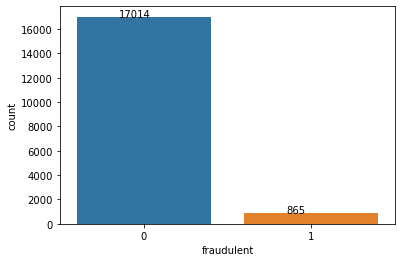

In [6]:
# Count the number of real-fake job postings, show results in a countplot
ax=sb.countplot(data=jobs, x=jobs['fraudulent'])
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

In [7]:
# Convert title and description to strings
jobs['title']=jobs['title'].astype("string")
jobs['description']=jobs['description'].astype("string")

# Remove punctuations
more_punctuations='–…’'
punctuation_list=list(string.punctuation)+list(more_punctuations)

def remove_punctuation(text):
    # Replace full stops preceding a capital letter with space
    text=text.replace('.',' ')
    edited_text="".join([i for i in text if i not in punctuation_list])
    return edited_text

jobs['title']=jobs['title'].apply(lambda x: remove_punctuation(x))
jobs['description']=jobs['description'].apply(lambda x: remove_punctuation(x))

# Remove '\xa0' and '\xad' from some rows, no idea what is that
jobs['description']=jobs['description'].str.replace('\xa0', ' ')
jobs['description']=jobs['description'].str.replace('\xad', ' ')

# Remove website links from description column
jobs['description'] = jobs['description'].apply(lambda x: re.sub(r'\bhttp|url\S+', '', x) if isinstance(x, str) else x)

# Add space between lowercase and capital letters
jobs['title'] = jobs['title'].str.replace(r'([a-z])([A-Z])', r'\1 \2')
jobs['description']=jobs['description'].str.replace(r'([a-z])([A-Z])', r'\1 \2')

# Remove all non word characters or whitespace characters
jobs['title'] = jobs['title'].replace('[^\w\s]+', '', regex=True)

# Remove extra spaces
jobs['title'] = jobs['title'].str.replace('\s+', ' ', regex=True)
jobs['description'] = jobs['description'].str.replace('\s+', ' ', regex=True)

# Convert text to lowercase
jobs['title'] = jobs['title'].str.lower()
jobs['description'] = jobs['description'].str.lower()


C:\Users\user\AppData\Local\Temp\ipykernel_53220\3523138861.py:26: FutureWarning: The default value of regex will change from True to False in a future version.
  jobs['title'] = jobs['title'].str.replace(r'([a-z])([A-Z])', r'\1 \2')
C:\Users\user\AppData\Local\Temp\ipykernel_53220\3523138861.py:27: FutureWarning: The default value of regex will change from True to False in a future version.
  jobs['description']=jobs['description'].str.replace(r'([a-z])([A-Z])', r'\1 \2')


In [8]:
jobs['description'][1678]

'summa view is opzoek naar een interim business controller met een passie voor business intelligence summa view is een jong bedrijf uit amersfoort die mensen kennis en software levert op het snijvlak van controlling en business intelligence wij bieden onze klanten topcontrollers ofwel summa view specialists aan die de beschikking hebben over een gereedschapskist vol met kennis extra technische ondersteuning van developers en software op het gebied van business intelligence oplossingen die summa view biedt zijn inventief eenvoudig maar krachtig zodat organisaties zelf in staat zijn hun business intelligenceactiviteiten naar een hoger plan te tillen voor onze projecten zijn wij continue op zoek naar interim business controllers die onze passie voor microsoft bi delen je bent een generalist die zich als een vis in het water voelt bij complexe controlling en itprojecten of het nu om financial logistieke marketing of salesvraagstukken gaat het maakt je niet uit je weet met je kennis en pass

#### As we can see, some descriptions are not entirely in english, which can affect the accuracy of our analysis

In [9]:
# Remove rows that are not largely in English
from langdetect import detect_langs

def is_mostly_english(text):
    try:
        languages = detect_langs(text)
        english_prob = 0.0

        for lang in languages:
            if lang.lang == 'en':
                english_prob = lang.prob
        
        # At least 80% of the words are in english
        if english_prob >= 0.8:
            return True
        else:
            return False
    except:
        return False


jobs=jobs[jobs['description'].apply(is_mostly_english)]
jobs.shape

(17705, 3)

In [10]:
# Remove duplicates
print("Number of duplicates: ", jobs.duplicated().sum())

duplicates=pd.DataFrame(jobs[jobs.duplicated()])
duplicates


Number of duplicates:  2281


,title,description,fraudulent
40,english teacher abroad,play with kids get paid for it love travel job...,0
41,english teacher abroad,play with kids get paid for it love travel job...,0
48,english teacher abroad,play with kids get paid for it love travel job...,0
80,english teacher abroad,play with kids get paid for it love travel job...,0
89,english teacher abroad,play with kids get paid for it love travel job...,0
...,...,...,...
17833,web designer,were looking for a web designer with a passion...,0
17847,user support technician,perform basic workstation trouble analysis to ...,0
17854,talent management process manager,we have more than 1500 job openings in our web...,0
17868,cnc programmer,we have more than 1500 job openings in our web...,0


In [11]:
# Keep only the first version of duplicate rows
jobs.drop_duplicates(keep='first', inplace=True)
jobs.shape

(15424, 3)

In [12]:
jobs.describe()

,fraudulent
count,15424.000000
mean,0.042661
std,0.202098
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [14]:
# Save the editing csv 
jobs.to_csv('jobs.csv', index=False)

# Exploratory Data Analysis 

## Frequency Analysis

In [58]:
# First, let's import the libraries needed for NLP
import nltk
nltk.download('punkt')
from collections import Counter
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [57]:
# Before removing stop words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(jobs['description'], 20)
common = pd.DataFrame(common_words, columns=['description', 'count'])
top_words = common.groupby('description').sum()['count'].sort_values(ascending=False)
top_words=top_words[0:10]




(10, 1)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

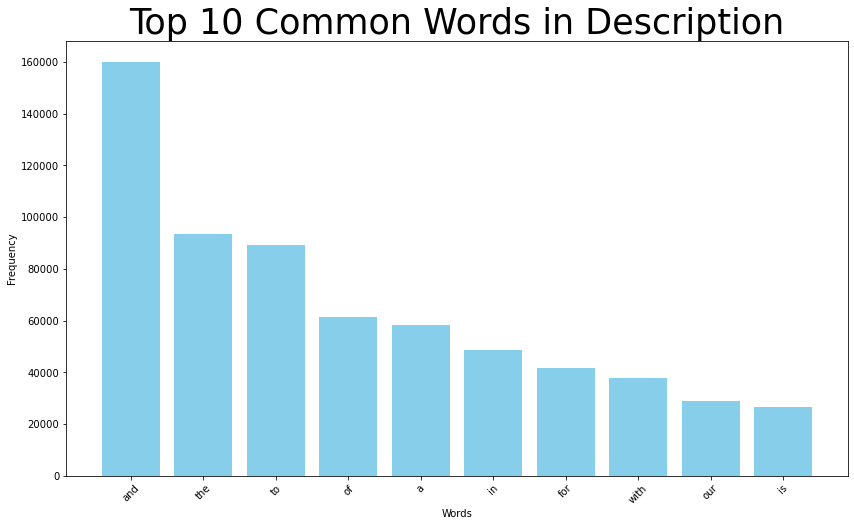

In [67]:
# Perform data preprocessing and count word frequencies
word_counts=Counter(' '.join(jobs['description']).split())
top_words=dict(word_counts.most_common(10))

# Create a bar plot
plt.figure(figsize=(14,8))
plt.bar(top_words.keys(), top_words.values(), color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Common Words in Description', fontsize=35)
plt.xticks(rotation=45)

In [19]:
# Tokenize title and description and remove stopwords
stopwords=nltk.corpus.stopwords.words('english')
stopwords[0:10]

jobs['title_tokenized']=jobs['title'].apply(nltk.word_tokenize)
jobs['title_tokenized']=jobs['title_tokenized'].apply(lambda x: [i for i in x if i not in stopwords])

jobs['desc_tokenized']=jobs['description'].apply(nltk.word_tokenize)
jobs['desc_tokenized']=jobs['desc_tokenized'].apply(lambda x: [i for i in x if i not in stopwords])

jobs.tail()

,title,description,fraudulent,title_tokenized,desc_tokenized
15419,java script developer,sr java script developer experience 410 years ...,0,"[java, script, developer]","[sr, java, script, developer, experience, 410,..."
15420,account director distribution,just in case this is the first time youve visi...,0,"[account, director, distribution]","[case, first, time, youve, visited, website, v..."
15421,payroll accountant,the payroll accountant will focus primarily on...,0,"[payroll, accountant]","[payroll, accountant, focus, primarily, payrol..."
15422,project cost control staff engineer cost contr...,experienced project cost control staff enginee...,0,"[project, cost, control, staff, engineer, cost...","[experienced, project, cost, control, staff, e..."
15423,graphic designer,nemsia studios is looking for an experienced v...,0,"[graphic, designer]","[nemsia, studios, looking, experienced, visual..."


In [9]:
# Split into 2 categories
real_jobs=jobs[jobs['fraudulent']==0]
fake_jobs=jobs[jobs['fraudulent']==1]

In [ ]:
# Finding Frequency Distribution for real jobs' description
real_words=nltk.FreqDist(real_jobs['desc_tokenized'].sum())
top_real_words=real_words.most_common(20)

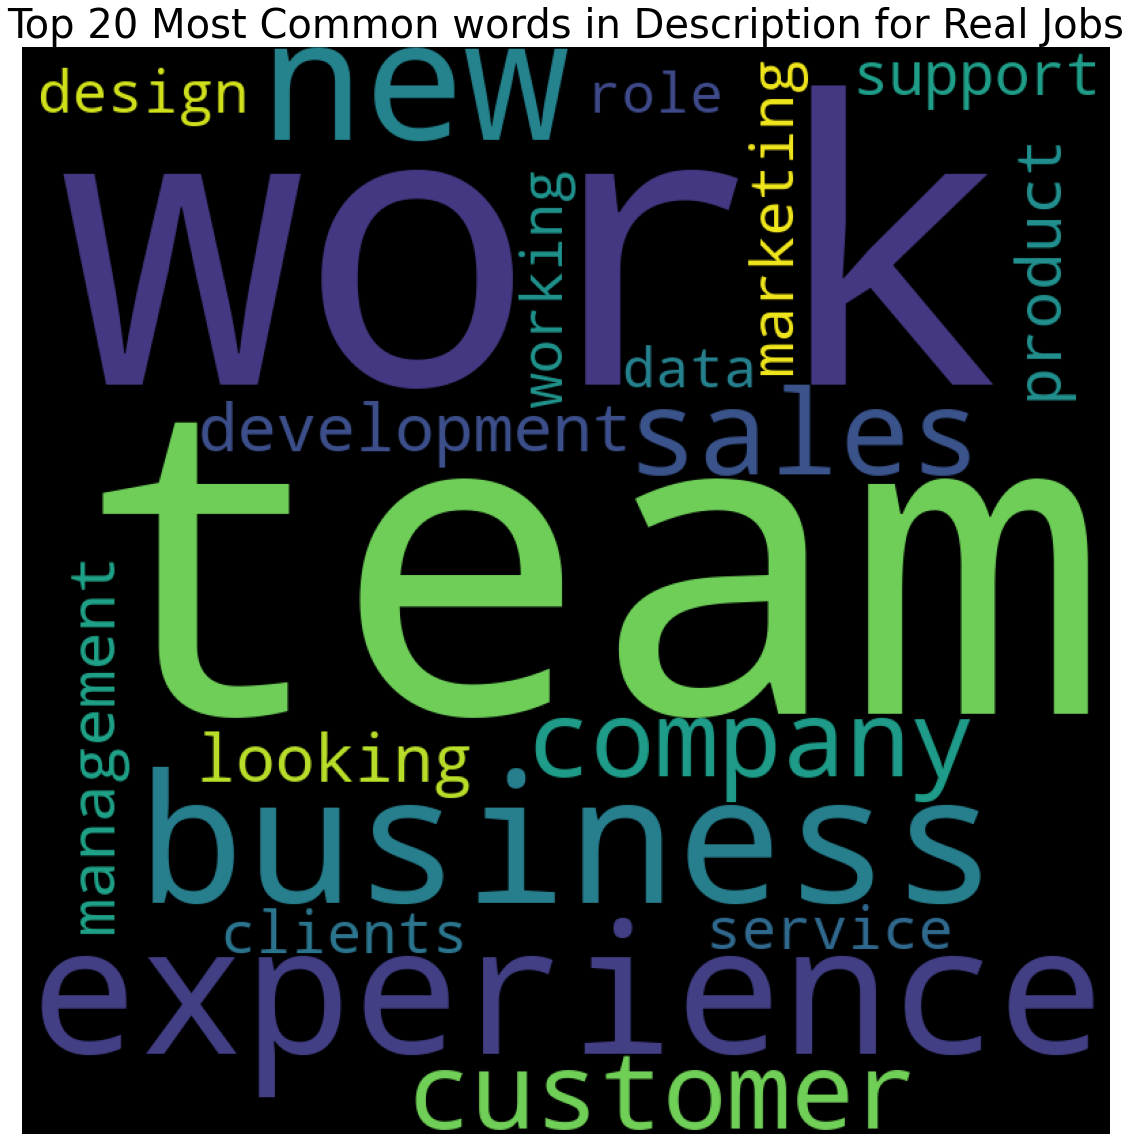

In [35]:
# Displaying the top 20 common words in description of real jobs
real_wc=WordCloud(width=800, height=800, background_color='black').generate_from_frequencies(dict(top_real_words))
plt.figure(figsize=(24,20))
plt.imshow(real_wc)
plt.axis("off")
plt.title('Top 20 Most Common words in Description for Real Jobs', fontsize=40)
plt.show()

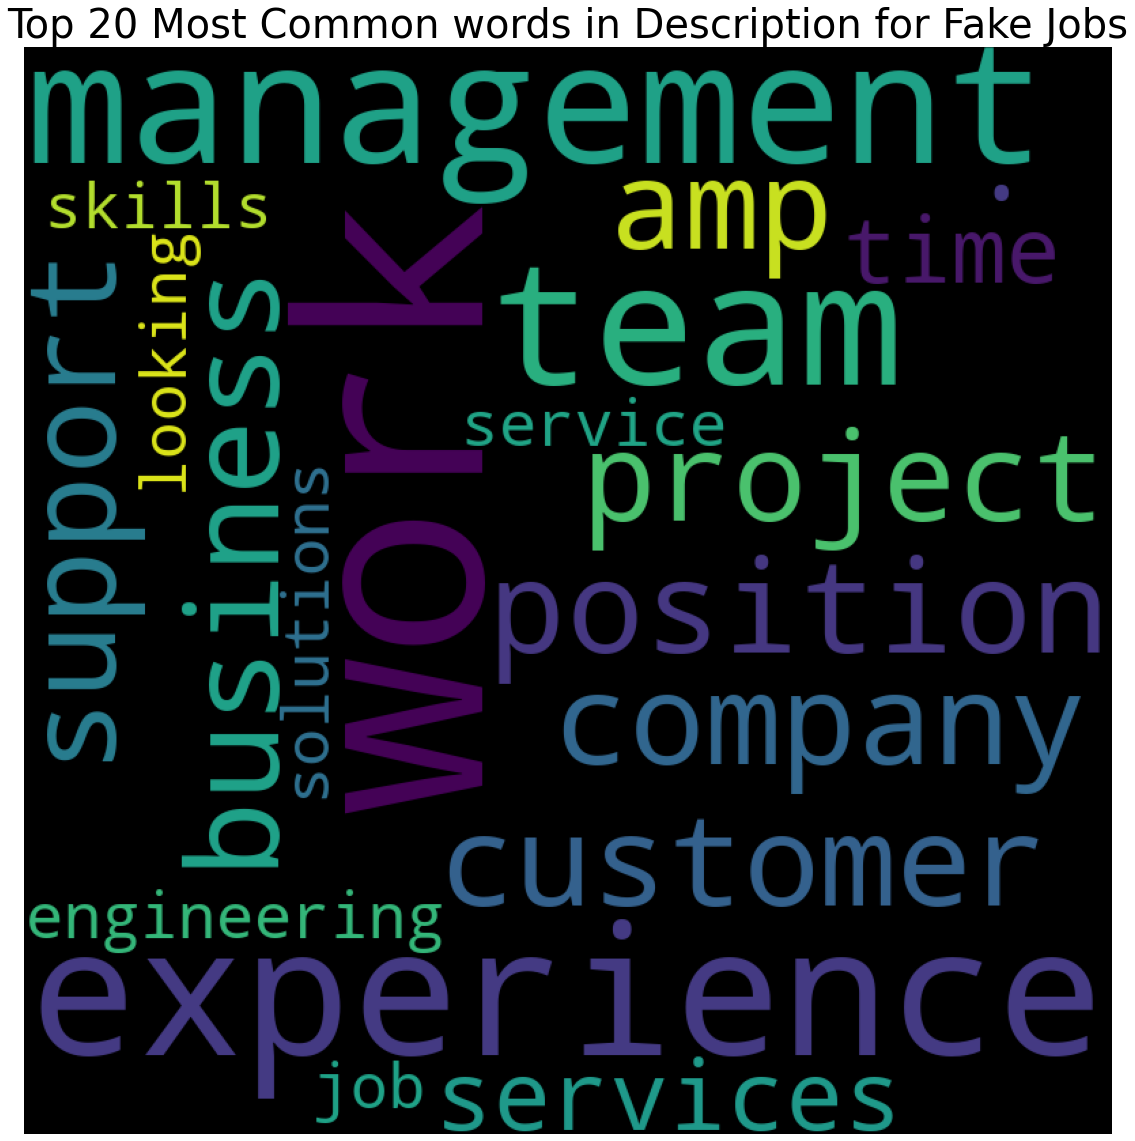

In [36]:
# Finding Frequency Distribution for fake jobs' description
fake_words=nltk.FreqDist(fake_jobs['desc_tokenized'].sum())
top_fake_words=fake_words.most_common(20)

# Displaying the top 20 common words in description of fake jobs
fake_wc=WordCloud(width=800, height=800, background_color='black').generate_from_frequencies(dict(top_fake_words))
plt.figure(figsize=(24,20))
plt.imshow(fake_wc)
plt.axis("off")
plt.title('Top 20 Most Common words in Description for Fake Jobs', fontsize=40)
plt.show()

## Length Analysis

In [ ]:
# Lets calculate the character length for title and description
jobs['title_length']=jobs['title'].apply(len)
jobs['desc_length']=jobs['description'].apply(len)

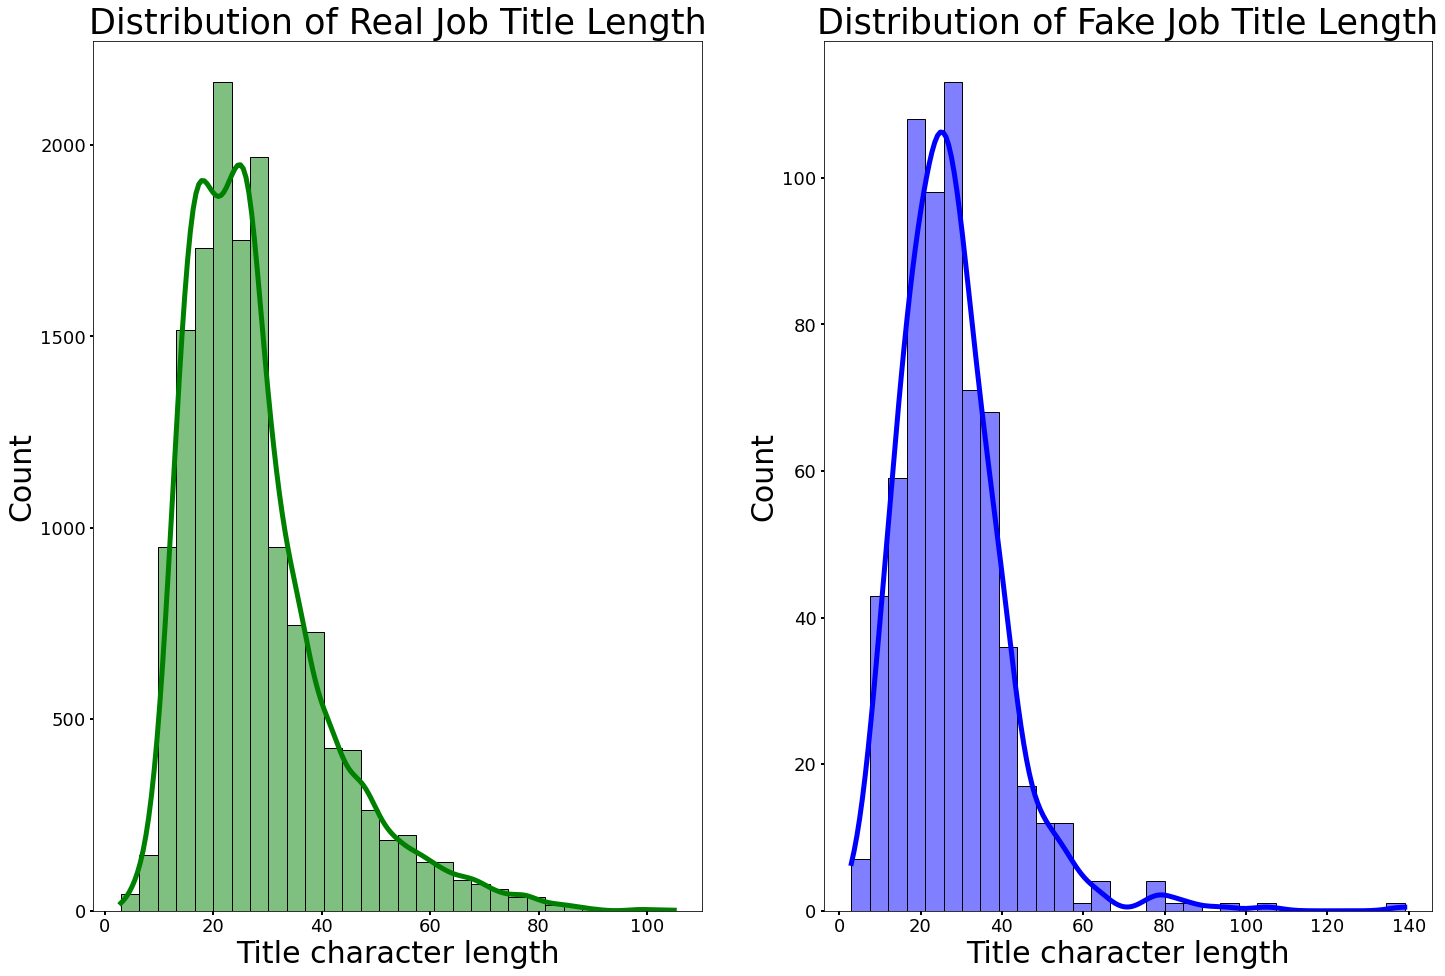

In [33]:
# Plot a histogram to illustrate the distribution of title character length

plt.figure(figsize=(24,16))

plt.subplot(1,2,1)
sb.histplot(real_jobs['title_length'], bins=30, kde=True,line_kws={'linewidth': 5}, color='green')
plt.title('Distribution of Real Job Title Length', fontsize=35)
plt.xlabel('Title character length',fontsize=30)
plt.tick_params(width=2, labelsize=18)
plt.ylabel('Count',fontsize=30)

plt.subplot(1,2,2)
sb.histplot(fake_jobs['title_length'], bins=30, kde=True, line_kws={'linewidth': 5}, color='blue')
plt.title('Distribution of Fake Job Title Length', fontsize=35)
plt.xlabel('Title character length', fontsize=30)
plt.ylabel('Count',fontsize=30)
plt.tick_params(width=2, labelsize=18)
plt.show()



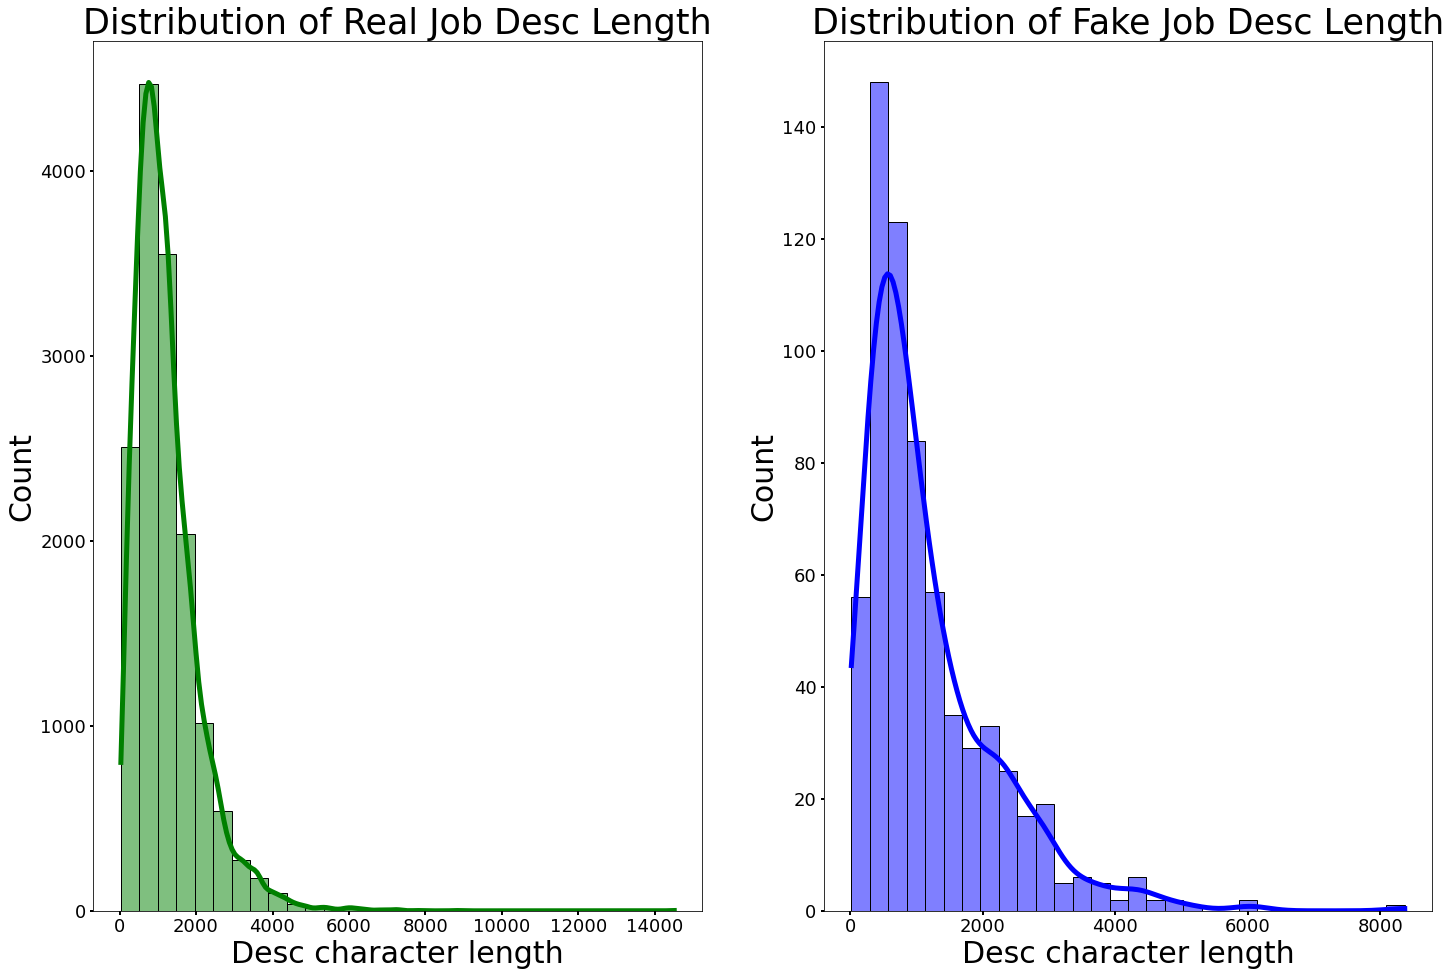

In [34]:
# Do the same for description character lengths

plt.figure(figsize=(24,16))

plt.subplot(1,2,1)
sb.histplot(real_jobs['desc_length'], bins=30, kde=True,line_kws={'linewidth': 5}, color='green')
plt.title('Distribution of Real Job Desc Length', fontsize=35)
plt.xlabel('Desc character length',fontsize=30)
plt.tick_params(width=2, labelsize=18)
plt.ylabel('Count',fontsize=30)

plt.subplot(1,2,2)
sb.histplot(fake_jobs['desc_length'], bins=30, kde=True, line_kws={'linewidth': 5}, color='blue')
plt.title('Distribution of Fake Job Desc Length', fontsize=35)
plt.xlabel('Desc character length', fontsize=30)
plt.ylabel('Count',fontsize=30)
plt.tick_params(width=2, labelsize=18)
plt.show()

# Machine Learning

# Deep Learning in TensorFlow

This section is made possible with the help of Sudip Shrestha, whose publication in Towards Data Science (NLP: Spam Detection in SMS (text) data using Deep Learning) taught me how to apply Keras sequential model to this project.

In [2]:
# Lets use TensorFlow2 to build a real-fake job posting model
import tensorflow as tf

# For train test split
from sklearn.model_selection import train_test_split

# For text pre-processing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# For modelling
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, Dropout, LSTM, Bidirectional

# For evaluation
from sklearn.metrics import accuracy_score, confusion_matrix

In [69]:
jobs=pd.read_csv('jobs_updated.csv')
jobs

,description,fraudulent
0,marketing intern food52 a fastgrowing james be...,0
1,customer service cloud video production organi...,0
2,commissioning machinery assistant cma our clie...,0
3,account executive washington dc the company es...,0
4,bill review manager job title itemization revi...,0
...,...,...
15419,java script developer sr java script developer...,0
15420,account director distribution just in case th...,0
15421,payroll accountant the payroll accountant will...,0
15422,project cost control staff engineer cost contr...,0


In [44]:
# Combine title and description into a single column 
jobs['description']=jobs['title']+" "+jobs['description']
jobs=jobs.drop('title', axis=1)

In [71]:
# Split into train and test datasets
x_train, x_test, y_train, y_test=train_test_split(jobs['description'], jobs['fraudulent'], test_size=0.25, random_state = 434)

In [72]:
# Tokenization of words which converts text into numerical representation
# num_words: Indicate how many unique words to load in training and testing data
# char_level: Indicate type of token (character/word)
# oov_token: When used, out of vocabulary token will be added to word index in the corpus 
tokenizer=Tokenizer(num_words=500, char_level=False, oov_token="<OOV>")

# Load x_train into Tokenizer
tokenizer.fit_on_texts(x_train)

In [75]:
# Display the word index
word_index = tokenizer.word_index

# Print out the first 10 indexes
word_list = list(word_index.items())[:10]
for key, value in word_list:
    print(key, value)

<OOV> 1
and 2
the 3
to 4
of 5
a 6
in 7
for 8
with 9
our 10


In [8]:
# Check number of unique tokens in train dataset
print("There are "+ str(len(word_index)) + " unique tokens in the training dataset")

There are 40513 unique tokens in the training dataset


In [9]:
# Sequencing and padding
# On train dataset
x_train_seq=tokenizer.texts_to_sequences(x_train)
x_train_pad=pad_sequences(x_train_seq, maxlen=150, padding="post", truncating="post")

# On test dataset
x_test_seq=tokenizer.texts_to_sequences(x_test)
x_test_pad=pad_sequences(x_test_seq, maxlen=150, padding="post", truncating="post")

In [16]:
# Shape of tensor

print('Shape of training tensor: ', x_train_pad.shape)
print('Shape of testing tensor: ', x_test_pad.shape)

# Before padding
print(f'Before padding: ({len(x_train_seq[0])}, {len(x_train_seq[1])})')

# After padding
print(f'After padding: ({len(x_train_pad[0])}, {len(x_train_pad[1])})')
print(x_train_pad[0])


Shape of training tensor:  (11568, 150)
Shape of testing tensor:  (3856, 150)
Before padding: (261, 113)
After padding: (150, 150)
[ 30 240   1   1  11   6   1  34  22  11 362   1  37   1  82  52  14   1
   4   1   4 232  21 357  39   1   1   1   1   1   1   3 128 107  38 166
   2   1  56   7   1   1   1   3  19 127   1   4   1   4  82   9   1   7
   1   1   2   1   1  77   1  11  36   8   6  30 240  52  11 148   4   1
   1   3   1 385   1   2   1   6  19   5 255 150   1  80  12  14   6 400
   1  30 364   9 210  82  58   1   1  12   4   1 164   1 128 107  83   4
   3   1   1 154 112  12 172   4  20   8   6   1  34   1  37   6 255  19
   7   1   1 365  77   1  29  66  15 124   1   1   2  91   6   1  30  19
   5   1   2   1  30   1]


## Dense architecture

In [3]:
# Load the relevant files
x_train_pad=np.load('x_train_pad.npy')
x_test_pad=np.load('x_test_pad.npy')
y_train=pd.read_pickle('y_train')
y_test=pd.read_pickle('y_test')

In [4]:
# Using a neural network architecture
# Define hyper-parameters
vocab_size=500
embeding_dim=16
drop_value=0.2
n_dense=24
input_len=150

In [5]:
# Define Dense architecture
model=Sequential()
model.add(Embedding(vocab_size,embeding_dim, input_length=input_len))
model.add(GlobalAveragePooling1D())
model.add(Dense(24,activation='relu'))
model.add(Dropout(drop_value))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 16)           8000      
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 8,433
Trainable params: 8,433
Non-trainable params: 0
______________________________________________________

In [6]:
# Compile the dense classifier model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
# Training the dense model
# Epochs: Number of times the learning algorithm will work through the entire training data set
num_epochs=30

# Callbacks: Stop the training when learner begins over-fitting (validation loss increased)
stop=EarlyStopping(monitor='val_loss', patience=3)

model_fit=model.fit(x_train_pad, y_train, epochs=num_epochs, validation_data=(x_test_pad, y_test), callbacks=[stop], verbose=2)


Epoch 1/30
362/362 - 2s - loss: 0.2695 - accuracy: 0.9544 - val_loss: 0.1615 - val_accuracy: 0.9598 - 2s/epoch - 7ms/step
Epoch 2/30
362/362 - 1s - loss: 0.1693 - accuracy: 0.9565 - val_loss: 0.1543 - val_accuracy: 0.9598 - 988ms/epoch - 3ms/step
Epoch 3/30
362/362 - 1s - loss: 0.1615 - accuracy: 0.9565 - val_loss: 0.1439 - val_accuracy: 0.9598 - 928ms/epoch - 3ms/step
Epoch 4/30
362/362 - 1s - loss: 0.1477 - accuracy: 0.9565 - val_loss: 0.1321 - val_accuracy: 0.9598 - 938ms/epoch - 3ms/step
Epoch 5/30
362/362 - 1s - loss: 0.1353 - accuracy: 0.9565 - val_loss: 0.1228 - val_accuracy: 0.9598 - 940ms/epoch - 3ms/step
Epoch 6/30
362/362 - 1s - loss: 0.1264 - accuracy: 0.9568 - val_loss: 0.1180 - val_accuracy: 0.9598 - 950ms/epoch - 3ms/step
Epoch 7/30
362/362 - 1s - loss: 0.1206 - accuracy: 0.9621 - val_loss: 0.1148 - val_accuracy: 0.9637 - 944ms/epoch - 3ms/step
Epoch 8/30
362/362 - 1s - loss: 0.1147 - accuracy: 0.9642 - val_loss: 0.1123 - val_accuracy: 0.9642 - 945ms/epoch - 3ms/step
Epo

In [8]:
# Save model 
model.save('dense_model.h5')

<Figure size 1152x1008 with 0 Axes>

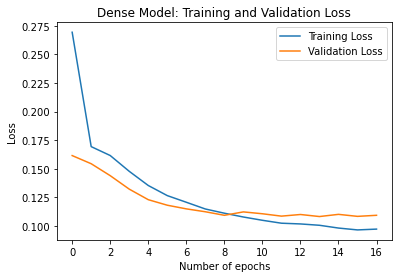

<Figure size 1152x1008 with 0 Axes>

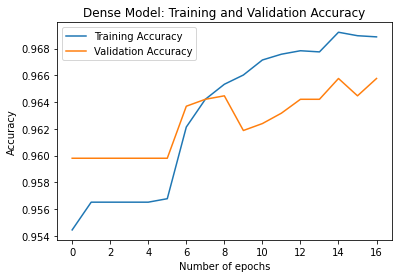

In [10]:
# Create a dataframe for training results
model_fit_df=pd.DataFrame(model_fit.history)
model_fit_df.rename(columns={'loss': 'Training Loss', 'accuracy': 'Training Accuracy','val_loss': 'Validation Loss','val_accuracy': 'Validation Accuracy'}, inplace=True)

# Define a plot graph functions to be used repeatedly
def plot_graph(var1, var2, string1):
    model_fit_df[[var1, var2]].plot()
    plt.title('Dense Model: Training and Validation ' + string1)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string1)
    plt.legend([var1, var2])

# Display Training and Validation Loss
plt.figure(figsize=(16,14))
plot_graph('Training Loss', 'Validation Loss', 'Loss')

# Display Training and Validation Accuracy
plt.figure(figsize=(16,14))
plot_graph('Training Accuracy', 'Validation Accuracy', 'Accuracy')

In [11]:
# Testing our model
y_pred=model.predict(x_test_pad)

# Classify (1: Fraudulent) or (0: Non-Fraudulent)
y_pred_cat=(y_pred>=0.5).astype(int)

print('Accuracy: ', accuracy_score(y_test,y_pred_cat))

121/121 [==============================] - 0s 2ms/step
Accuracy:  0.9657676348547718


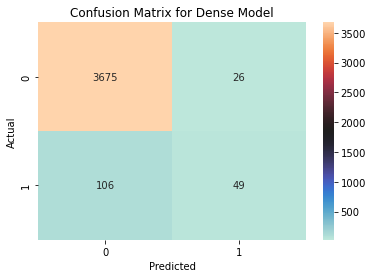

In [12]:
# Display the results
cm=confusion_matrix(y_test,y_pred_cat)
sb.heatmap(cm, annot=True, cmap='icefire', fmt='d')
plt.title('Confusion Matrix for Dense Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Long Short Term Memory (LSTM) Model

In [13]:
# Load the relevant files
x_train_pad=np.load('x_train_pad.npy')
x_test_pad=np.load('x_test_pad.npy')
y_train=pd.read_pickle('y_train')
y_test=pd.read_pickle('y_test')

In [14]:
# Define the model
model_lstm = Sequential()
model_lstm.add(Embedding(vocab_size, embeding_dim, input_length=input_len))
model_lstm.add(LSTM(units=20, dropout=0.2, recurrent_dropout=0.2))
model_lstm.add(Dense(units=1, activation='sigmoid'))

# Compile model
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
# Summary of the model 
model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 150, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 20)                2960      
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 10,981
Trainable params: 10,981
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Fitting the model
stop=EarlyStopping(monitor='val_loss', patience=2)
model_lstm_fit=model_lstm.fit(x_train_pad, y_train, epochs=30, validation_data=(x_test_pad, y_test), callbacks=[stop], verbose=2)

Epoch 1/30
362/362 - 33s - loss: 0.2119 - accuracy: 0.9556 - val_loss: 0.1691 - val_accuracy: 0.9598 - 33s/epoch - 90ms/step
Epoch 2/30
362/362 - 24s - loss: 0.1771 - accuracy: 0.9565 - val_loss: 0.1673 - val_accuracy: 0.9598 - 24s/epoch - 67ms/step
Epoch 3/30
362/362 - 24s - loss: 0.1751 - accuracy: 0.9565 - val_loss: 0.1682 - val_accuracy: 0.9598 - 24s/epoch - 67ms/step
Epoch 4/30
362/362 - 24s - loss: 0.1731 - accuracy: 0.9565 - val_loss: 0.1672 - val_accuracy: 0.9598 - 24s/epoch - 68ms/step
Epoch 5/30
362/362 - 24s - loss: 0.1703 - accuracy: 0.9565 - val_loss: 0.1659 - val_accuracy: 0.9598 - 24s/epoch - 67ms/step
Epoch 6/30
362/362 - 25s - loss: 0.1647 - accuracy: 0.9565 - val_loss: 0.1634 - val_accuracy: 0.9598 - 25s/epoch - 68ms/step
Epoch 7/30
362/362 - 25s - loss: 0.1564 - accuracy: 0.9564 - val_loss: 0.1643 - val_accuracy: 0.9598 - 25s/epoch - 69ms/step
Epoch 8/30
362/362 - 26s - loss: 0.1495 - accuracy: 0.9574 - val_loss: 0.1608 - val_accuracy: 0.9603 - 26s/epoch - 72ms/step


In [17]:
# Save model 
model.save('lstm_model.h5')

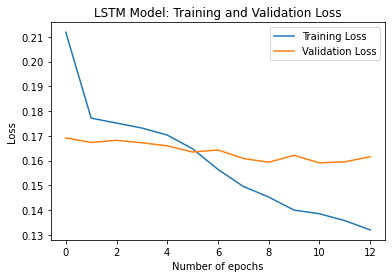

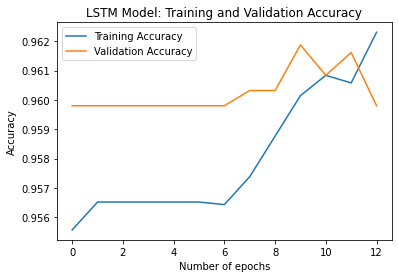

In [18]:
# Create a dataframe for training results
model_lstm_fit_df=pd.DataFrame(model_lstm_fit.history)
model_lstm_fit_df.rename(columns={'loss': 'Training Loss', 'accuracy': 'Training Accuracy','val_loss': 'Validation Loss','val_accuracy': 'Validation Accuracy'}, inplace=True)

# Define a plot graph functions to be used repeatedly
def plot_graph1(var1, var2, string1):
    model_lstm_fit_df[[var1, var2]].plot()
    plt.title('LSTM Model: Training and Validation ' + string1)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string1)
    plt.legend([var1, var2])
    
# Display Training and Validation Loss
plot_graph1('Training Loss', 'Validation Loss', 'Loss')

# Display Training and Validation Accuracy
plot_graph1('Training Accuracy', 'Validation Accuracy', 'Accuracy')

In [19]:
# Testing our model
y_pred1=model_lstm.predict(x_test_pad)

# Classify (1: Fraudulent) or (0: Non-Fraudulent)
y_pred1_cat=(y_pred1>=0.5).astype(int)

print('Accuracy: ', accuracy_score(y_test,y_pred1_cat))

121/121 [==============================] - 2s 15ms/step
Accuracy:  0.9598029045643154


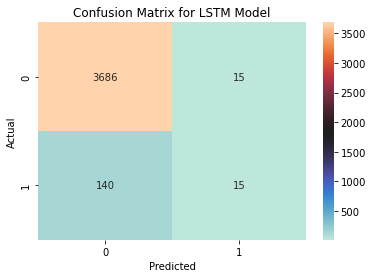

In [20]:
# Display the results
cm1=confusion_matrix(y_test,y_pred1_cat)
sb.heatmap(cm1, annot=True, cmap='icefire', fmt='d')
plt.title('Confusion Matrix for LSTM Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Bi-directional Long Short Term Memory (BiLSTM) Model

In [21]:
# Load the relevant files
x_train_pad=np.load('x_train_pad.npy')
x_test_pad=np.load('x_test_pad.npy')
y_train=pd.read_pickle('y_train')
y_test=pd.read_pickle('y_test')

In [22]:
# Define the BiLSTM model
model_Bi=Sequential()
model_Bi.add(Embedding(vocab_size, embeding_dim, input_length=input_len))
model_Bi.add(Bidirectional(LSTM(20,dropout=0.2,recurrent_dropout=0.2)))
model_Bi.add(Dense(1,activation='sigmoid'))

In [23]:
# Compile the model
model_Bi.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Summary of the model
model_Bi.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 150, 16)           8000      
                                                                 
 bidirectional (Bidirectiona  (None, 40)               5920      
 l)                                                              
                                                                 
 dense_3 (Dense)             (None, 1)                 41        
                                                                 
Total params: 13,961
Trainable params: 13,961
Non-trainable params: 0
_________________________________________________________________


In [24]:
# Fitting the model
stop=EarlyStopping(monitor='val_loss', patience=2)
model_Bi_fit=model_Bi.fit(x_train_pad, y_train, epochs=30, validation_data=(x_test_pad, y_test), callbacks=[stop], verbose=2)

Epoch 1/30
362/362 - 56s - loss: 0.1950 - accuracy: 0.9550 - val_loss: 0.1558 - val_accuracy: 0.9598 - 56s/epoch - 154ms/step
Epoch 2/30
362/362 - 48s - loss: 0.1285 - accuracy: 0.9573 - val_loss: 0.1186 - val_accuracy: 0.9627 - 48s/epoch - 133ms/step
Epoch 3/30
362/362 - 50s - loss: 0.1122 - accuracy: 0.9634 - val_loss: 0.1084 - val_accuracy: 0.9652 - 50s/epoch - 138ms/step
Epoch 4/30
362/362 - 49s - loss: 0.1046 - accuracy: 0.9672 - val_loss: 0.1081 - val_accuracy: 0.9650 - 49s/epoch - 136ms/step
Epoch 5/30
362/362 - 52s - loss: 0.0988 - accuracy: 0.9694 - val_loss: 0.1069 - val_accuracy: 0.9658 - 52s/epoch - 144ms/step
Epoch 6/30
362/362 - 51s - loss: 0.0937 - accuracy: 0.9716 - val_loss: 0.1103 - val_accuracy: 0.9652 - 51s/epoch - 141ms/step
Epoch 7/30
362/362 - 51s - loss: 0.0901 - accuracy: 0.9718 - val_loss: 0.1137 - val_accuracy: 0.9663 - 51s/epoch - 141ms/step


In [25]:
# Save model 
model.save('bi-lstm_model.h5')

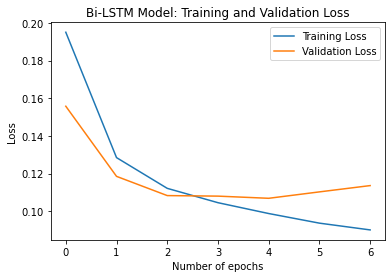

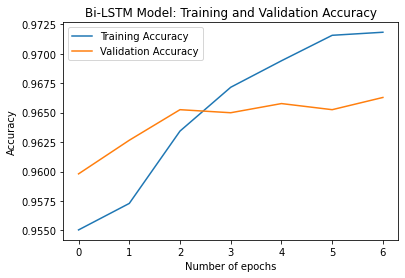

In [26]:
# Create a dataframe for training results
model_Bi_fit_df=pd.DataFrame(model_Bi_fit.history)
model_Bi_fit_df.rename(columns={'loss': 'Training Loss', 'accuracy': 'Training Accuracy','val_loss': 'Validation Loss','val_accuracy': 'Validation Accuracy'}, inplace=True)

# Define a plot graph functions to be used repeatedly
def plot_graph2(var1, var2, string1):
    model_Bi_fit_df[[var1, var2]].plot()
    plt.title('Bi-LSTM Model: Training and Validation ' + string1)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string1)
    plt.legend([var1, var2])
    
# Display Training and Validation Loss
plot_graph2('Training Loss', 'Validation Loss', 'Loss')

# Display Training and Validation Accuracy
plot_graph2('Training Accuracy', 'Validation Accuracy', 'Accuracy')

In [27]:
# Testing our model
y_pred2=model_Bi.predict(x_test_pad)

# Classify (1: Fraudulent) or (0: Non-Fraudulent)
y_pred2_cat=(y_pred2>=0.5).astype(int)

print('Accuracy: ', accuracy_score(y_test,y_pred2_cat))

121/121 [==============================] - 4s 26ms/step
Accuracy:  0.9662863070539419


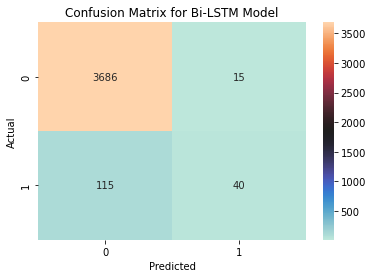

In [28]:
# Display the results
cm2=confusion_matrix(y_test,y_pred2_cat)
sb.heatmap(cm2, annot=True, cmap='icefire', fmt='d')
plt.title('Confusion Matrix for Bi-LSTM Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Comparison among the three different models

In [29]:
# Comparing loss and accuracy
print('Dense model: ', model.evaluate(x_test_pad, y_test))
print()
print('LSTM model: ', model_lstm.evaluate(x_test_pad,y_test))
print()
print('Bi-LSTM model: ', model_Bi.evaluate(x_test_pad,y_test))

121/121 [==============================] - 0s 3ms/step - loss: 0.1092 - accuracy: 0.9658
Dense model:  [0.10916794836521149, 0.9657676219940186]

121/121 [==============================] - 2s 17ms/step - loss: 0.1616 - accuracy: 0.9598
LSTM model:  [0.16156943142414093, 0.9598029255867004]

121/121 [==============================] - 3s 23ms/step - loss: 0.1137 - accuracy: 0.9663
Bi-LSTM model:  [0.11366620659828186, 0.966286301612854]


After comparing the validation loss and accuracy of the models, we observed the Dense model performed best. However, it is still worth noting that all the accuracy scores are considered relatively high (>95%) which could be attributed to overfitting. Moving forward, we can try using different hyper-parameters to improve the models further. The dataset used has an imbalance number of fraudulent and non-fraudulent postings which could have resulted in overfitting as well.

Nonetheless, lets attempt to use our Dense model to predict if a new set of job postings is fraudulent or not. :) 